In [22]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [23]:
df = pd.read_csv("../data/adult.csv")
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)
df.set_index("id", inplace=True)
df = df.loc[df["workclass"] != "?"]
df = df.loc[df["occupation"] != "?"]
df["salary"].value_counts()
np.dtype[df["salary K$"]]


numpy.dtype[id
0         39
1         35
2         27
3         43
4         25
        ... 
32556     36
32557    173
32558     40
32559     38
32560    243
Name: salary K$, Length: 30718, dtype: int64]

# Task 1
Print the count of men and women in the dataset.

In [24]:
df["sex"].value_counts()

sex
Male      20788
Female     9930
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [25]:
men = df[df["sex"] == "Male"]
men["age"].mean()

np.float64(39.188089282278234)

# Task 3
Get the percentage of people from Poland (native-country)

In [26]:
(df['native-country'].value_counts(normalize=True) * 100)["Poland"]

np.float64(0.18230353538641839)

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K

In [27]:
high_earners = df[df["salary"] == ">50K"]
low_earners = df[df["salary"] == "<=50K"]
mean_high_earners = high_earners["age"].mean()
std_high_earners = high_earners["age"].std()
mean_low_earners = low_earners["age"].mean()
std__low_earners = low_earners["age"].std()

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [28]:
high_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
no_higher_education = df[~df["education"].isin(high_education)]
no_higher_education[no_higher_education["salary"] == ">50K"]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
id,,,,,,,,,,,,
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K,166
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
...,...,...,...,...,...,...,...,...,...,...,...,...
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,?,>50K,212
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [29]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,831.0,37.892900,16.168073,17.0,23.50,36.0,52.00,90.0
11th,1056.0,32.367424,15.091426,17.0,18.00,28.5,43.00,90.0
12th,393.0,32.104326,14.206631,17.0,19.00,29.0,41.00,79.0
1st-4th,156.0,44.782051,14.883762,19.0,33.00,44.5,56.25,81.0
5th-6th,303.0,41.788779,14.715006,17.0,28.00,41.0,53.00,82.0
7th-8th,573.0,47.527051,15.650735,17.0,34.00,49.0,60.00,90.0
9th,463.0,40.384449,15.402083,17.0,28.00,38.0,53.00,90.0
Assoc-acdm,1020.0,37.215686,10.504850,19.0,29.00,36.0,44.00,90.0
Assoc-voc,1321.0,38.233157,11.177297,19.0,30.00,37.0,45.00,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [30]:
men = df[df["sex"] == "Male"]
no_married = ["Divorced", "Never-married", "Separated", "Widower"]
men_no_married = men[men["marital-status"].isin(no_married)]
men_married = men[~men["marital-status"].isin(no_married)]
percent_married_less_50K = (men_no_married["salary"].value_counts(normalize=True) * 100)["<=50K"]
percent_no_married_less_50K = (men_married["salary"].value_counts(normalize=True) * 100)["<=50K"]

if percent_no_married_less_50K > percent_married_less_50K:
    print("Single men earn less than married men on average.")
else:
    print("Married men earn less than single men on average.")

Married men earn less than single men on average.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [31]:
max_hours = df["hours-per-week"].max()
df.groupby('hours-per-week').size().reset_index(name='count')

,hours-per-week,count
0,1,8
1,2,15
2,3,24
3,4,28
4,5,39
...,...,...
89,95,2
90,96,5
91,97,2
92,98,11


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

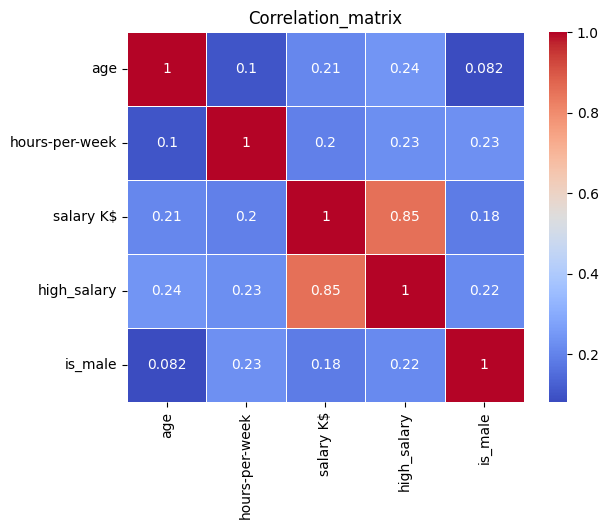

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df["high_salary"] = np.where(df["salary"] == ">50K", True, False)
df["is_male"] = np.where(df["sex"] == "Male", True, False) 
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation_matrix')
plt.show()

